# Ingeniería de features, modelos avanzados e interpretación de modelos

## Realizado por: María Isabel Sierra S

### PARTE A - Transformación de Datos

1.  Detección y eliminación de Outliers
2.  Encoding
3.  Escalado de datos

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv', header=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

## Check point dataset

Cumpliendo las instancias anteriores dadas en el Sprint 1 para poder llevar a cabo la comparación de desempeño entre el mejor modelo obtenido **árbol de decisión** como benchmark, se filtran los siguientes lineamientos:

- Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
- Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
- Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
- Selecciona las columnas rooms, bedrooms, bathrooms, surface_total, surface_covered y price.

In [3]:
#Solo datos de Capital Federal
data = data.loc[(data['l2']=='Capital Federal')]

In [4]:
#Tipo de propiedad
data = data.loc[(data['property_type']=='Departamento') | (data['property_type']=='PH') | (data['property_type']=='Casa')]
data.property_type.unique()

array(['Departamento', 'PH', 'Casa'], dtype=object)

In [5]:
data.isnull().sum()

start_date            0
end_date              0
created_on            0
lat                4534
lon                4548
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          2171
surface_total      8917
surface_covered    9235
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

In [6]:
#Propiedades mayor a 15 y menores a 1000 m^2
data = data[(data.surface_total <= 1000) & (data.surface_total >= 15)
           ]

In [7]:
#Eliminar propiedades que superen los 4M USD
data = data[(data.price <= 4000000)]

In [8]:
data.isnull().sum()

start_date            0
end_date              0
created_on            0
lat                4263
lon                4263
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms           880
surface_total         0
surface_covered     517
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

In [9]:
data[(data.surface_covered > data.surface_total)] 

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
446,2019-03-04,2019-08-17,2019-03-04,-34.613369,-58.488637,Argentina,Capital Federal,Villa Santa Rita,5.0,4.0,3.0,230.0,244.0,490000.0,USD,VENTA CASA 5 AMBIENTES,Corredor Responsable: Mónica Silvia Martinuzzi...,Casa,Venta
859,2019-04-25,2019-05-21,2019-04-25,-34.561805,-58.459579,Argentina,Capital Federal,Belgrano,3.0,2.0,1.0,43.0,44.0,133000.0,USD,Departamento 3 ambientes.Belgrano,Corredor Responsable: Gustavo Guastello - C.U....,Departamento,Venta
924,2019-04-25,9999-12-31,2019-04-25,-34.584201,-58.496345,Argentina,Capital Federal,Villa Pueyrredón,3.0,2.0,1.0,65.0,66.0,187000.0,USD,VENTA DEPTO 3 AMB VILLA PUEYRREDON CON COCHERA,Corredor Responsable: EMMA A. PIERSIMONI - CPI...,Departamento,Venta
1329,2019-07-08,2019-11-12,2019-07-08,-34.576322,-58.406275,Argentina,Capital Federal,Recoleta,2.0,1.0,2.0,44.0,45.0,235000.0,USD,DIVINO 2 AMB BAÑO Y TOIL RECICLADO POR ARQUITECTO,Corredor Responsable: KARINA QUINTEROS - CUCIC...,Departamento,Venta
1438,2019-07-08,2019-08-17,2019-07-08,-34.610787,-58.393919,Argentina,Capital Federal,Congreso,3.0,2.0,1.0,78.0,79.0,235000.0,USD,Venta dep-Congreso 3 amb-Restaurado-Impecable-,Corredor Responsable: Ariel Champanier - C.U.C...,Departamento,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145138,2020-01-15,2020-03-12,2020-01-15,-34.626300,-58.452418,Argentina,Capital Federal,Caballito,1.0,1.0,1.0,24.0,25.0,54900.0,USD,VENTA DEPTO MONOAMBIENTE- IDEAL INVERSOR-CABAL...,Corredor Responsable: Patricia Maria Sodor - C...,Departamento,Venta
145146,2020-01-15,2020-01-21,2020-01-15,-34.605086,-58.384630,Argentina,Capital Federal,San Nicolás,1.0,1.0,1.0,21.0,22.0,48000.0,USD,Monoambiente exc ubicación 1 cuadra obelisco,Corredor Responsable: Marcelo Trujillo - CUCIC...,Departamento,Venta
145262,2020-01-15,9999-12-31,2020-01-15,-34.600988,-58.433062,Argentina,Capital Federal,Villa Crespo,3.0,2.0,1.0,51.0,52.0,127000.0,USD,Depto 3 ambientes.Muy buen estado. Villa crespo,Corredor Responsable: Patricia Maria Sodor - C...,Departamento,Venta
145376,2020-01-15,2020-02-05,2020-01-15,-34.650700,-58.385906,Argentina,Capital Federal,Barracas,6.0,4.0,2.0,197.0,290.0,329900.0,USD,CASA 6 AMBIENTES LOTE PROPIO BARRACAS,Corredor Responsable: GUILLERMO FRIMET - CUCIC...,Casa,Venta


In [10]:
#Reemplazar aquellas instancias que cumplen que la superficie cubierta sea mayor que la total por la superficie tota
data['surface_covered'] = np.where(data.surface_covered > data.surface_total, data['surface_total'], data['surface_covered'])

In [11]:
#Imputar aquellos valores nulos que existen de surface_covered, por aquellos que si tiene surface_total
data['surface_covered'] = np.where(data['surface_covered'] == 'nan', data['surface_covered'], data['surface_total'])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82373 entries, 0 to 146558
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start_date       82373 non-null  object 
 1   end_date         82373 non-null  object 
 2   created_on       82373 non-null  object 
 3   lat              78110 non-null  float64
 4   lon              78110 non-null  float64
 5   l1               82373 non-null  object 
 6   l2               82373 non-null  object 
 7   l3               82373 non-null  object 
 8   rooms            82373 non-null  float64
 9   bedrooms         82373 non-null  float64
 10  bathrooms        81493 non-null  float64
 11  surface_total    82373 non-null  float64
 12  surface_covered  82373 non-null  float64
 13  price            82373 non-null  float64
 14  currency         82373 non-null  object 
 15  title            82373 non-null  object 
 16  description      82373 non-null  object 
 17  property_ty

### 1. Detección y eliminación de Outliers

#### EDA - Visualización de outliers

#### Rango intercuartíl

In [13]:
data.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,78110.000000,78110.000000,82373.000000,82373.000000,81493.000000,82373.000000,82373.000000,8.237300e+04
mean,-34.598459,-58.435010,3.006810,2.000413,1.553495,95.239714,95.239714,2.628461e+05
std,0.023533,0.035893,1.308269,1.051184,0.852610,77.258098,77.258098,2.976546e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,15.000000,15.000000,6.000000e+03
25%,-34.612337,-58.457843,2.000000,1.000000,1.000000,49.000000,49.000000,1.250000e+05
50%,-34.598771,-58.432867,3.000000,2.000000,1.000000,71.000000,71.000000,1.799000e+05
75%,-34.584180,-58.409600,4.000000,3.000000,2.000000,110.000000,110.000000,2.800000e+05
max,-34.535909,-58.353930,26.000000,15.000000,14.000000,1000.000000,1000.000000,4.000000e+06


Las variables que se encuentran con mayor dispersión o desviación estándar de los datos es price, surface_covered y surface_total. La detección de valores atípicos se realizará para la variable de surface_total, ya que esta es la variable más importante a tener en cuenta en referencia al precio de una propiedad. Se puede observar también, que la desviación estándar de surface_covered es similar a la variable que procederé a detectar atípicos. Es probable que al eliminar valores atípicos en surface_total, los valores atípicos de surface_covered sean eliminados. 

C:\Users\isabe\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


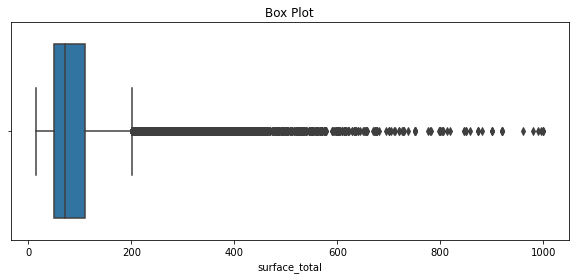

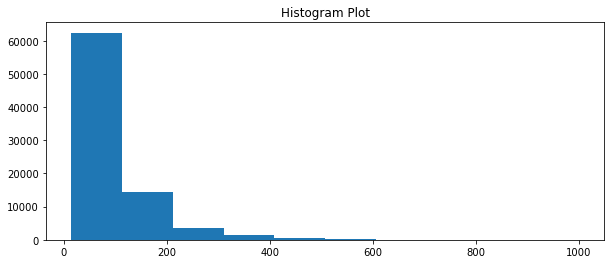

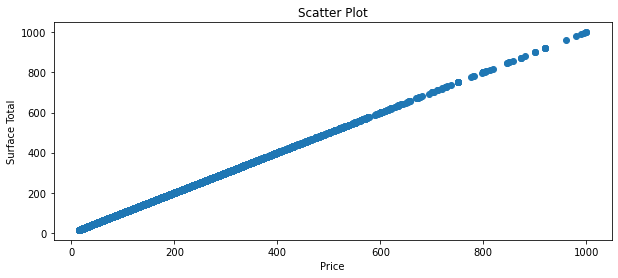

C:\Users\isabe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


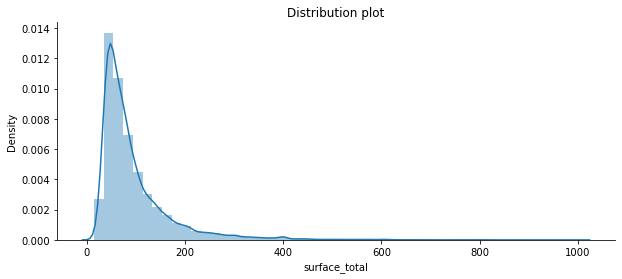

In [14]:
#Visualización de datos
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box_plots(data['surface_total'])

def hist_plots(df):
    plt.figure(figsize=(10, 4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()
hist_plots(data['surface_total'])

def scatter_plots(df1,df2):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2)
    ax.set_xlabel('Price')
    ax.set_ylabel('Surface Total')
    plt.title("Scatter Plot")
    plt.show()
scatter_plots(data['surface_total'], data['surface_covered'])

def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
dist_plots(data['surface_total'])

C:\Users\isabe\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


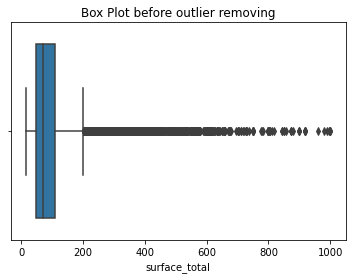

C:\Users\isabe\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


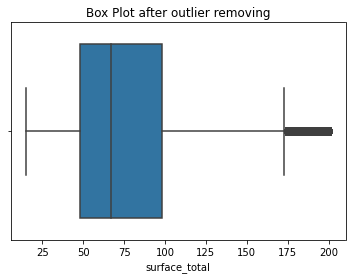

In [15]:
#Eliminación de valores atípicos por rango intercuartil (surface_total)
sns.boxplot(data['surface_total'])
plt.title("Box Plot before outlier removing")
plt.show()

def drop_outliers(df, field_name):
    iqr = 1.5 * (df[field_name].quantile(0.75) - df[field_name].quantile(0.25))
            
    df.drop(df[df[field_name] > (iqr + df[field_name].quantile(0.75))].index, inplace=True)
    df.drop(df[df[field_name] < (df[field_name].quantile(0.25) - iqr)].index, inplace=True)
    
drop_outliers(data, 'surface_total')
sns.boxplot(data['surface_total'])
plt.title("Box Plot after outlier removing")
plt.show()

In [16]:
data.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,72376.000000,72376.000000,76102.000000,76102.000000,75297.000000,76102.000000,76102.000000,7.610200e+04
mean,-34.598436,-58.435434,2.820609,1.862566,1.439008,77.910199,77.910199,2.131970e+05
std,0.023226,0.035327,1.079006,0.907443,0.702699,39.603014,39.603014,1.537878e+05
min,-34.695087,-58.530467,1.000000,0.000000,1.000000,15.000000,15.000000,6.000000e+03
25%,-34.612099,-58.457861,2.000000,1.000000,1.000000,48.000000,48.000000,1.200000e+05
50%,-34.599003,-58.433197,3.000000,2.000000,1.000000,67.000000,67.000000,1.690000e+05
75%,-34.584784,-58.411317,4.000000,2.000000,2.000000,98.000000,98.000000,2.500000e+05
max,-34.535909,-58.353930,21.000000,15.000000,14.000000,201.000000,201.000000,3.249900e+06


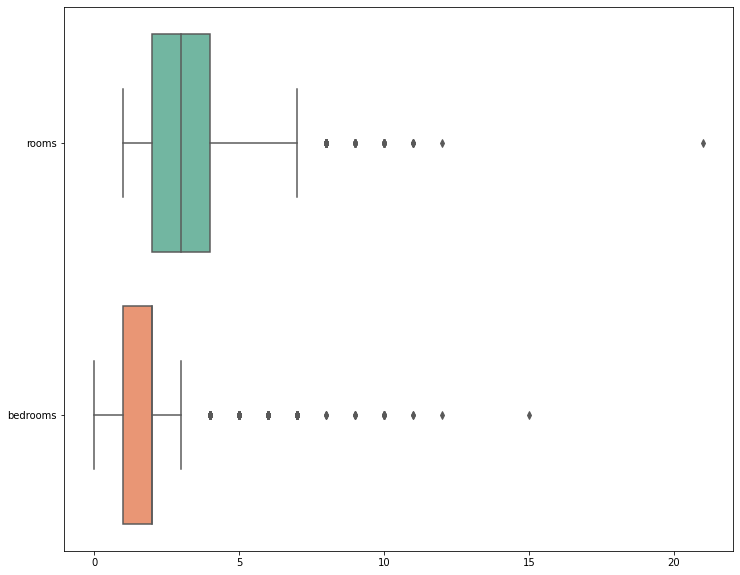

In [17]:
plt.figure(figsize = (12,10))

df_1 = data[['rooms', 'bedrooms']]

ax = sns.boxplot(data=df_1, orient="h", palette="Set2")

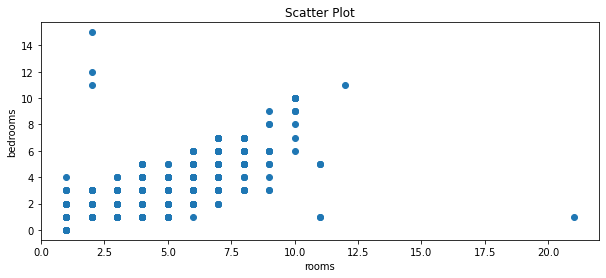

In [18]:
def scatter_plots(df1,df2):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2)
    ax.set_xlabel('rooms')
    ax.set_ylabel('bedrooms')
    plt.title("Scatter Plot")
    plt.show()
scatter_plots(data['rooms'], data['bedrooms'])

En la variable *rooms* se puede visualizar un valor atípico de 21 habitaciones. Vamos a visualizar esta instancia y otras que parecen sospechosas para observar si existe alguna inconsistencia.

In [19]:
data[data['rooms']==21]

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
42577,2019-12-08,2019-12-17,2019-12-08,-34.5942,-58.4038,Argentina,Capital Federal,Recoleta,21.0,1.0,1.0,53.0,53.0,135000.0,USD,Depto 2 ambientes Excelente Ubicación!,Corredor Responsable: Veronica Grela Reina - C...,Departamento,Venta


In [20]:
data[data['bedrooms']==11]

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
56981,2019-07-03,2019-09-14,2019-07-03,-34.606890,-58.443673,Argentina,Capital Federal,Caballito,2.0,11.0,1.0,58.0,58.0,145000.0,USD,Exc 2 amb con balcón 60M2 totales,Corredor Responsable: Marcelo Trujillo - CUCIC...,Departamento,Venta
141964,2019-07-31,2020-01-17,2019-07-31,-34.603431,-58.385080,Argentina,Capital Federal,Centro / Microcentro,12.0,11.0,2.0,200.0,200.0,230000.0,USD,SEMPISO HOTEL FAMILIAR OFICINA EN VENTA CENTRO...,Sempiso Sup Tot Aprox 200m2 ; 11 Habitaciones ...,Departamento,Venta


Es posible que hubiera un error de digitación, ya que es inconsistente que exista una cantidad de habitaciones igual a 21 con una superficie total de 53 $m^2$. Es por esto que se procede a eliminar esta instancia.
Eso mismo ocurre con la instancia 56981 para un número de alcobas igual a 11 con una superficie de 58 $m^2$

In [21]:
data.drop(index = 56981, inplace=True)

In [22]:
data.drop(data[data['rooms']==21].index, inplace=True)


In [23]:
data[data['bedrooms']==15]

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
8843,2019-11-03,2019-12-23,2019-11-03,-34.630209,-58.364202,Argentina,Capital Federal,Boca,2.0,15.0,1.0,47.0,47.0,100000.0,USD,EXCELENTE 2 AMBIENTES CON BALCON AL FRENTE,2 AMB. AL FRENTE CON CÓMODO BALCÓN VISTA ...,Departamento,Venta


In [24]:
data.drop(data[data['bedrooms']==15].index, inplace=True)

In [25]:
data[data['bedrooms']==12]

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
45177,2019-02-17,2019-03-27,2019-02-17,NaN,NaN,Argentina,Capital Federal,Belgrano,2.0,12.0,1.0,56.0,56.0,171000.0,USD,¡ULTIMOS DEPARTAMENTOS! FIDEICOMISO MONTAÑESES...,El precio corresponde a una unidad de 2 ambien...,Departamento,Venta


In [26]:
data.drop(data[data['bedrooms']==12].index, inplace=True)

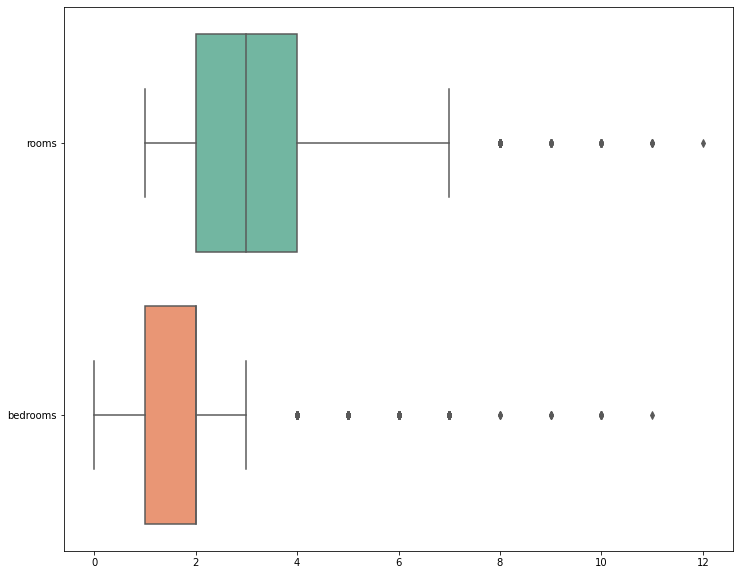

In [27]:
plt.figure(figsize = (12,10))

df_1 = data[['rooms', 'bedrooms']]

ax = sns.boxplot(data=df_1, orient="h", palette="Set2")

<AxesSubplot:xlabel='surface_total'>

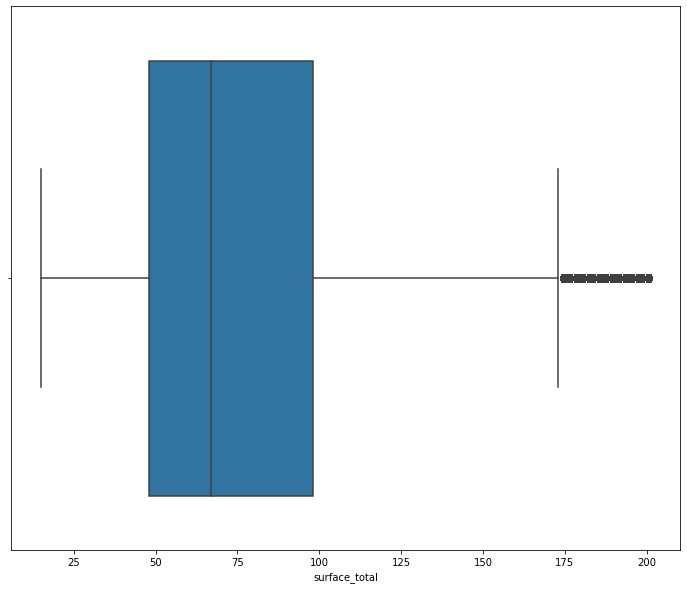

In [28]:
plt.figure(figsize=(12,10))
sns.boxplot(x = 'surface_total', data = data)

<AxesSubplot:xlabel='bathrooms'>

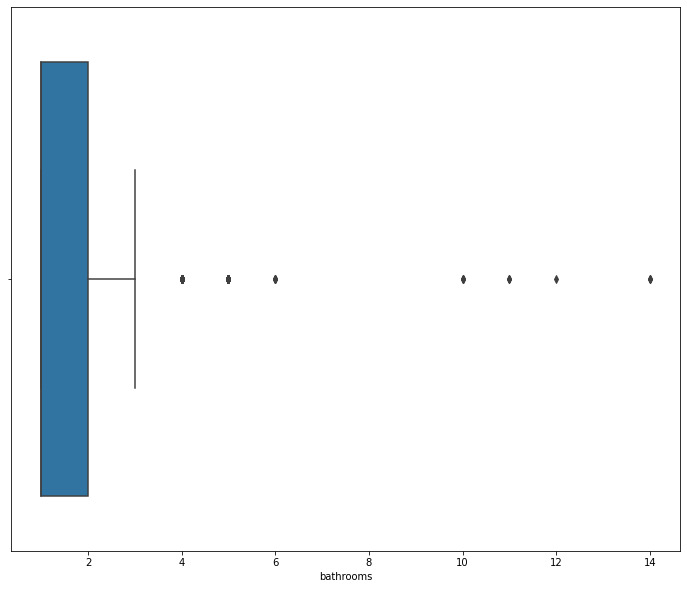

In [29]:
plt.figure(figsize=(12,10))
sns.boxplot(x = 'bathrooms', data = data)

In [30]:
data[data['bathrooms']==14]

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
35960,2019-01-11,2019-02-04,2019-01-11,-34.576782,-58.423782,Argentina,Capital Federal,Palermo,2.0,1.0,14.0,50.0,50.0,225000.0,USD,JUNCAL 4600.PALERMO NUEVO.VENTA 2 AMBIENTES CO...,EXCELENTE SEMIPISO 2 AMBIENTES EN PALERMO NUEV...,Departamento,Venta
132709,2019-02-13,2019-06-23,2019-02-13,NaN,NaN,Argentina,Capital Federal,Recoleta,2.0,1.0,14.0,45.0,45.0,159000.0,USD,SUIPACHA 1700.VENTA 2 AMBIENTES,EXCELENTE 2 AMBIENTES AL CONTRAFRENTE TOTALMEN...,Departamento,Venta
136930,2019-07-31,2020-01-17,2019-07-31,NaN,NaN,Argentina,Capital Federal,Recoleta,2.0,1.0,14.0,45.0,45.0,159000.0,USD,SUIPACHA 1700.VENTA 2 AMBIENTES,EXCELENTE 2 AMBIENTES AL CONTRAFRENTE TOTALMEN...,Departamento,Venta


In [31]:
data[data['bathrooms']==12]

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
53274,2019-05-03,2019-06-23,2019-05-03,-34.568806,-58.44981,Argentina,Capital Federal,Belgrano,1.0,1.0,12.0,38.0,38.0,140000.0,USD,"Belgrano - Edificio Live Zabala - 1 ambiente, ...",Entrega JUNIO 2019. NO APTO CRÉDITO A estrenar...,Departamento,Venta


In [32]:
data[data['bathrooms']==11]

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
62342,2019-02-14,2019-07-10,2019-02-14,-34.594600,-58.432658,Argentina,Capital Federal,Villa Crespo,3.0,2.0,11.0,47.0,47.0,105000.0,USD,DEPARTAMENTO EN VENTA,Xintel (GOP-GOP-8133) Venta de Departamento 3 ...,Departamento,Venta
73948,2020-01-21,2020-02-26,2020-01-21,-34.567614,-58.434551,Argentina,Capital Federal,Palermo,2.0,1.0,11.0,44.0,44.0,149000.0,USD,Soldado de la Independencia al 700,VENTA- 2 AMBIENTES- BALCÓN ATERRAZADO- LAS CAÑ...,Departamento,Venta
128033,2019-06-29,2019-09-14,2019-06-29,-34.609667,-58.424507,Argentina,Capital Federal,Almagro,3.0,2.0,11.0,100.0,100.0,199000.0,USD,PH 3 ambientes c/Patio y Terraza 100 M2 - Almagro,Corredor Responsable: Uno Bienes Raices SRL - ...,PH,Venta


In [33]:
data[data['bathrooms']==10]

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
19025,2019-09-23,2019-11-04,2019-09-23,-34.615226,-58.377551,Argentina,Capital Federal,Monserrat,2.0,1.0,10.0,33.0,33.0,90000.0,USD,VENTA DEPARTAMENTO DOS AMBIENTES MONTSERRAT,Corredor Responsable: Uno Bienes Raices SRL - ...,Departamento,Venta
19760,2019-11-08,2019-11-12,2019-11-08,-34.615226,-58.377551,Argentina,Capital Federal,Monserrat,2.0,1.0,10.0,33.0,33.0,85000.0,USD,VENTA DEPARTAMENTO DOS AMBIENTES MONTSERRAT,Corredor Responsable: Uno Bienes Raices SRL - ...,Departamento,Venta
58733,2019-11-13,2019-12-02,2019-11-13,-34.615226,-58.377551,Argentina,Capital Federal,Monserrat,2.0,1.0,10.0,33.0,33.0,85000.0,USD,RETASADO VENTA DEPARTAMENTO 2 AMBIENTES MONTSE...,Corredor Responsable: Uno Bienes Raices SRL - ...,Departamento,Venta
131845,2019-10-08,9999-12-31,2019-10-08,-34.682861,-58.466026,Argentina,Capital Federal,Villa Lugano,4.0,3.0,10.0,80.0,80.0,68000.0,USD,SE ALQUILA DPTO 4 AMB LUGANO I Y II,Se Vende Departamento 4 Ambientes en Villa Lug...,Departamento,Venta


In [34]:
data[data['bathrooms']==6]

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
34376,2019-04-11,2019-06-08,2019-04-11,-34.628543,-58.453338,Argentina,Capital Federal,Caballito,5.0,4.0,6.0,199.0,199.0,588300.0,USD,DONNA Fiore by Azcuy. Semipiso en triple frent...,Semipiso en triple frente. Departamento de 5 a...,Departamento,Venta
34377,2019-04-11,2019-06-23,2019-04-11,-34.628543,-58.453338,Argentina,Capital Federal,Caballito,5.0,4.0,6.0,199.0,199.0,568400.0,USD,DONNA Fiore by Azcuy. Semipiso en triple frent...,Semipiso en triple frente. Departamento de 5 a...,Departamento,Venta
65142,2019-07-14,2019-07-15,2019-07-14,-34.628543,-58.453338,Argentina,Capital Federal,Caballito,5.0,4.0,6.0,199.0,199.0,664100.0,USD,DONNA Fiore by Azcuy. Semipiso en triple frent...,Semipiso en triple frente. Departamento de 5 a...,Departamento,Venta
141796,2019-07-31,2019-09-04,2019-07-31,-34.628543,-58.453338,Argentina,Capital Federal,Caballito,5.0,4.0,6.0,199.0,199.0,664100.0,USD,DONNA Fiore by Azcuy. Semipiso en triple frent...,Semipiso en triple frente. Departamento de 5 a...,Departamento,Venta
145619,2020-01-20,9999-12-31,2020-01-20,-34.596275,-58.374802,Argentina,Capital Federal,Retiro,5.0,4.0,6.0,200.0,200.0,750000.0,USD,Espectacular Duplex con Pileta Propia y Vista ...,Increíble Duplex en e plena city porteña al fr...,Departamento,Venta


In [35]:
data[data['bathrooms']==5]

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
3711,2019-03-18,2019-06-09,2019-03-18,-34.595801,-58.394750,Argentina,Capital Federal,Recoleta,10.0,7.0,5.0,168.0,168.0,370000.0,USD,VENTA DEPARTAMENTO IDEAL OFICINAS CLÍNICA,Corredor Responsable: Ariel Champanier - CUCIC...,Departamento,Venta
8042,2019-03-09,2019-05-17,2019-03-09,-34.588616,-58.418107,Argentina,Capital Federal,Palermo,4.0,3.0,5.0,201.0,201.0,375000.0,USD,VENTA PH 4 AMB + DEP SERV PALERMO AL FRENTE,Corredor Responsable: Jorge Roca - CMCPSM 2550...,PH,Venta
8210,2019-03-09,2019-06-23,2019-03-09,-34.627735,-58.430333,Argentina,Capital Federal,Caballito,5.0,4.0,5.0,160.0,160.0,444100.0,USD,DONNA Magna by Azcuy,Departamento de 5 ambientes al frente.Full Ame...,Departamento,Venta
8795,2019-11-01,2019-11-23,2019-11-01,-34.617719,-58.362056,Argentina,Capital Federal,Puerto Madero,4.0,3.0,5.0,174.0,174.0,1150000.0,USD,Venta excelente departamento en Renoir 1,Renoir Torre 1Excelente departamento en lujosa...,Departamento,Venta
9049,2019-11-03,2019-12-23,2019-11-03,-34.560890,-58.452093,Argentina,Capital Federal,Belgrano,6.0,4.0,5.0,155.0,155.0,550000.0,USD,EXCELENTE PISO RECICLADO A NUEVO CON COCHERA,Excelente Piso que consta de living y comedor...,Departamento,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141836,2019-07-31,2019-12-20,2019-07-31,-34.609974,-58.361287,Argentina,Capital Federal,Puerto Madero,4.0,3.0,5.0,182.0,182.0,1140000.0,USD,"Increìble vista !! Altísimo, ya escriturado !!",Renoir Torre 2.Excelente departamento piso muy...,Departamento,Venta
141837,2019-07-31,2019-12-20,2019-07-31,-34.609974,-58.361287,Argentina,Capital Federal,Puerto Madero,4.0,3.0,5.0,182.0,182.0,1350000.0,USD,Puerto Madero - Departamento Venta USD 1.350.000,Renoir Torre 2Excelente departamento a estrena...,Departamento,Venta
141838,2019-07-31,2019-12-20,2019-07-31,-34.609974,-58.361287,Argentina,Capital Federal,Puerto Madero,4.0,3.0,5.0,182.0,182.0,1400000.0,USD,Puerto Madero - Departamento Venta USD 1.400.000,Renoir Torre 2.Excelente departamento a estren...,Departamento,Venta
141839,2019-07-31,2019-12-20,2019-07-31,-34.609974,-58.361287,Argentina,Capital Federal,Puerto Madero,4.0,3.0,5.0,182.0,182.0,1180000.0,USD,Departamento 2 Suites con dependencia!! Venta ...,Renoir Torre 2. Excelente departamento a estre...,Departamento,Venta


Al verificar las superficies dadas para las propiedades que presentan valores atípicos en el número de baños, podemos ver que las propiedades que tienen un número superior a 10 baños presentan inconsistencias en el tamaño de las propiedades, pareciendo ilógico que una propiedad pueda tener menos de 40 $m^2$ y tener por ejemplo, 11 baños. Procedo a acotar la cantidad de baños menor a 6 unidades.

In [36]:
data = data[data['bathrooms']<=6]

<AxesSubplot:xlabel='bathrooms'>

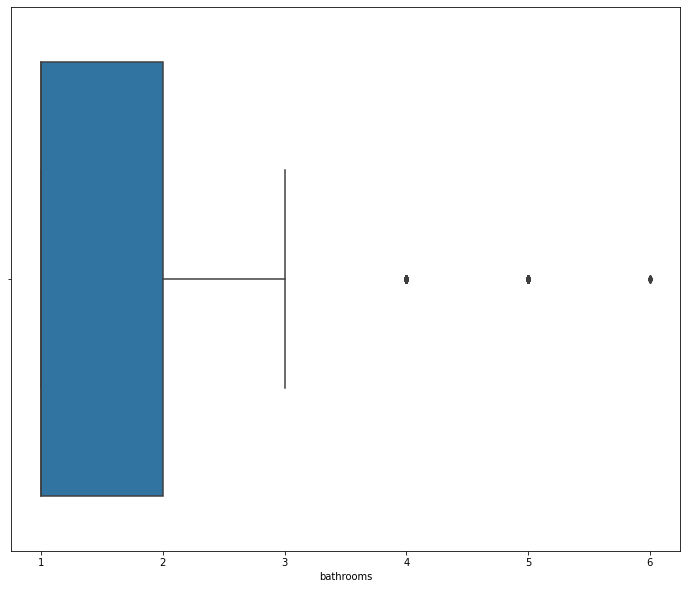

In [37]:
plt.figure(figsize=(12,10))
sns.boxplot(x = 'bathrooms', data = data)

In [38]:
data.price.max()

3249900.0

Al solo eliminar valores atípicos de *surface_total*, se eliminaron los de *surface_covered* como era supuesto. A su vez, podemos observar un cambio sustancial en la varianza de los datos de *price*. También observamos que el valor máximo de *price* cambio. Ya el mayor valor no es 4M USD.

In [39]:
data.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [40]:
data.to_csv('Base_Modelacion_Avanzada.csv')

In [41]:
#columnas para eliminar
columns = ['start_date', 'end_date', 'created_on', 
           'lat', 'lon', 'l1', 'l2', 'l3',
           'currency', 'title', 'description', 
           'operation_type', 'property_type'
          ]

In [42]:
data.drop(columns , axis = 1, inplace= True) 

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75282 entries, 0 to 146557
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rooms            75282 non-null  float64
 1   bedrooms         75282 non-null  float64
 2   bathrooms        75282 non-null  float64
 3   surface_total    75282 non-null  float64
 4   surface_covered  75282 non-null  float64
 5   price            75282 non-null  float64
dtypes: float64(6)
memory usage: 4.0 MB


In [44]:
data.isnull().sum()

rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
dtype: int64

## Evaluación de desempeño - Benchmark (Árbol de decisión)

In [45]:
X = data.drop(columns = 'price')
y = data[['price']]

## 2. Estandarización

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [48]:
X = pd.DataFrame(scaler.fit_transform(X))
X.shape

(75282, 5)

### Comparación desempeño

In [49]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
tree_regressor = DecisionTreeRegressor(max_depth= 6, random_state=42)

In [52]:
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=42)

In [53]:
y_pred= tree_regressor.predict(X_test)

In [54]:
tree_regressor.score(X_train, y_train)

0.6109701614952672

In [55]:
tree_regressor.score(X_test, y_test)

0.603441251541063

In [56]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
# The mean absolute error
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, y_pred))

Mean squared error: 9649623814.30
Coefficient of determination: 0.60
Mean absolute error: 56065.74


Finalmente, después de realizar todo el tratamiento de los datos podemos concluir que el **MAE** mejoró. Anteriormente era igual a **77000.78**, lo cual representa una mejora del 27% con preprocesamiento de los datos.


# Modelos Avanzados

## Encoders

In [57]:
data = pd.read_csv('Base_Modelacion_Avanzada.csv', header=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75282 entries, 0 to 75281
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       75282 non-null  int64  
 1   start_date       75282 non-null  object 
 2   end_date         75282 non-null  object 
 3   created_on       75282 non-null  object 
 4   lat              71565 non-null  float64
 5   lon              71565 non-null  float64
 6   l1               75282 non-null  object 
 7   l2               75282 non-null  object 
 8   l3               75282 non-null  object 
 9   rooms            75282 non-null  float64
 10  bedrooms         75282 non-null  float64
 11  bathrooms        75282 non-null  float64
 12  surface_total    75282 non-null  float64
 13  surface_covered  75282 non-null  float64
 14  price            75282 non-null  float64
 15  currency         75282 non-null  object 
 16  title            75282 non-null  object 
 17  description 

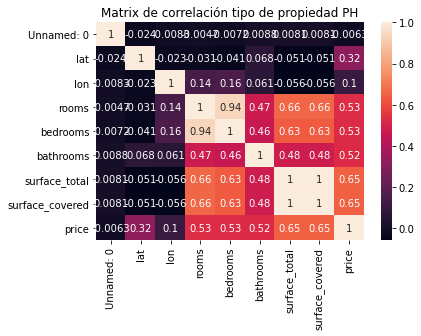

In [58]:
# PH
corrMatrix = data.loc[(data['property_type'])=='PH'].corr()
sns.heatmap(corrMatrix, annot=True)
plt.title("Matrix de correlación tipo de propiedad PH")
plt.show()

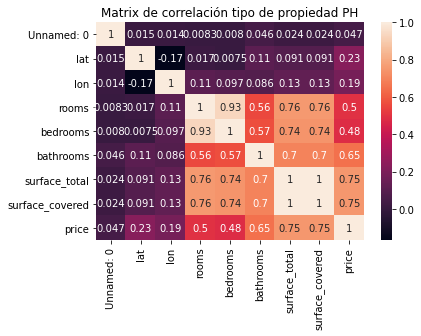

In [59]:
# Departamento
corrMatrix = data.loc[(data['property_type'])=='Departamento'].corr()
sns.heatmap(corrMatrix, annot=True)
plt.title("Matrix de correlación tipo de propiedad PH")
plt.show()

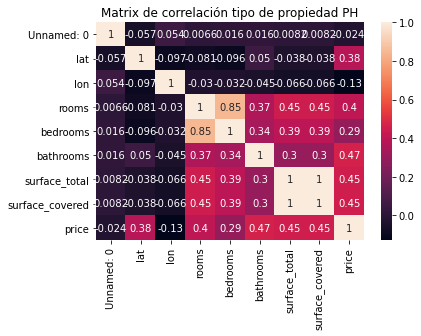

In [60]:
# Casa
corrMatrix = data.loc[(data['property_type'])=='Casa'].corr()
sns.heatmap(corrMatrix, annot=True)
plt.title("Matrix de correlación tipo de propiedad PH")
plt.show()

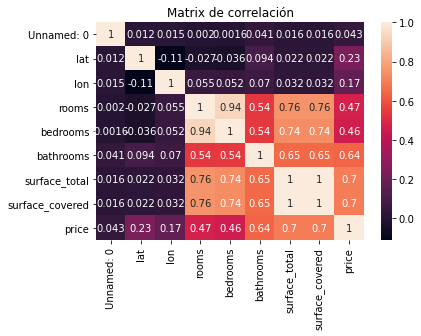

In [61]:
#General
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.title("Matrix de correlación")
plt.show()

In [62]:
data.columns

Index(['Unnamed: 0', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'l1', 'l2', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'currency', 'title', 'description',
       'property_type', 'operation_type'],
      dtype='object')

In [63]:
#columnas para eliminar
columns = ['Unnamed: 0', 'start_date', 'end_date', 'created_on', 
           'lat', 'lon', 'l1', 'l2',
           'currency', 'title', 'description', 
           'operation_type'
          ]

In [64]:
data.drop(columns, axis = 1, inplace= True)

In [65]:
#encoding
data = pd.get_dummies(data, columns=['l3', 'property_type'])

In [66]:
data.head(5)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,l3_Abasto,l3_Agronomía,l3_Almagro,l3_Balvanera,...,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque,property_type_Casa,property_type_Departamento,property_type_PH
0,7.0,7.0,2.0,140.0,140.0,153000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2.0,1.0,2.0,70.0,70.0,159000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2.0,1.0,1.0,45.0,45.0,125000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2.0,1.0,1.0,85.0,85.0,295000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2.0,1.0,1.0,56.0,56.0,150000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75282 entries, 0 to 75281
Data columns (total 66 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rooms                       75282 non-null  float64
 1   bedrooms                    75282 non-null  float64
 2   bathrooms                   75282 non-null  float64
 3   surface_total               75282 non-null  float64
 4   surface_covered             75282 non-null  float64
 5   price                       75282 non-null  float64
 6   l3_Abasto                   75282 non-null  uint8  
 7   l3_Agronomía                75282 non-null  uint8  
 8   l3_Almagro                  75282 non-null  uint8  
 9   l3_Balvanera                75282 non-null  uint8  
 10  l3_Barracas                 75282 non-null  uint8  
 11  l3_Barrio Norte             75282 non-null  uint8  
 12  l3_Belgrano                 75282 non-null  uint8  
 13  l3_Boca                     752

Gracias a la detección y eliminación de outliers, logramos también quedar sin valores nulos, por lo tanto no debemos hacer imputación.

In [68]:
data.isnull().sum()[0:15]

rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
l3_Abasto          0
l3_Agronomía       0
l3_Almagro         0
l3_Balvanera       0
l3_Barracas        0
l3_Barrio Norte    0
l3_Belgrano        0
l3_Boca            0
l3_Boedo           0
dtype: int64

## Reducción de dimensionalidad PCA

In [69]:
#X = data.drop(columns = 'price')
#y = data[['price']]

In [70]:
#from sklearn.decomposition import PCA
#from sklearn.model_selection import GridSearchCV
#pca = PCA(n_components=20)
#X_nuevo = pca.fit_transform(X)

In [71]:
#%%time
#pca_est = PCA(random_state=42)

#param_grid = {'n_components': [10, 15, 20, 22, 25, 30, 32, 35, 45, 50, 60, 65]}

#red_dim = GridSearchCV(pca_est, param_grid, cv=5)


#red_dim.fit(X,y)

Wall time: 25.8 s


C:\Users\isabe\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


GridSearchCV(cv=5, estimator=PCA(random_state=42),
             param_grid={'n_components': [10, 15, 20, 22, 25, 30, 32, 35, 45,
                                          50, 60, 65]})

In [72]:
#red_dim.best_params_

{'n_components': 60}

In [73]:
#pca = PCA(n_components=60)
#X_nuevo = pca.fit_transform(X)

In [74]:
#X_train, X_test, y_train, y_test = train_test_split(X_nuevo, y, test_size=0.33, random_state=42)

In [75]:
#tree_regressor = DecisionTreeRegressor(max_depth= 6, random_state=42)

In [76]:
#tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=42)

In [77]:
#y_pred= tree_regressor.predict(X_test)

In [78]:
#tree_regressor.score(X_train, y_train)

0.7441053364863325

In [79]:
#tree_regressor.score(X_test, y_test)

0.738200207596506

In [80]:
# The mean squared error
#print('Mean squared error: %.2f'
#      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
#print('Coefficient of determination: %.2f'
#      % r2_score(y_test, y_pred))
# The mean absolute error
#print('Mean absolute error: %.2f'
#      % mean_absolute_error(y_test, y_pred))

Mean squared error: 6370479837.29
Coefficient of determination: 0.74
Mean absolute error: 46390.79


El **MAE** para el caso de la reducción de dimensionalidad mejoró pero no sustancialmente. Es por está razón que se evade esta reducción dimensional para la modelación de los siguientes modelos.

## Modelo 1: Random Forest

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='price'), data.price, test_size=0.33, random_state=42)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [34]:
%%time
param_grid = {'n_estimators': np.arange(100, 160, 10),
              'min_samples_leaf': [2, 4, 6],
              'max_depth'   : np.arange(20, 100, 10)
             }
random_forest = GridSearchCV(
        estimator  = RandomForestRegressor(random_state = 42),
        param_grid = param_grid)

random_forest.fit(X = X_train, y = y_train) 

Wall time: 5h 14min 35s


GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': array([20, 30, 40, 50, 60, 70, 80, 90]),
                         'min_samples_leaf': [2, 4, 6],
                         'n_estimators': array([100, 110, 120, 130, 140, 150])})

In [35]:
print("Mejores hiperparámetros encontrados (cv)")
print(random_forest.best_params_, ":", random_forest.best_score_, random_forest.scoring)

Mejores hiperparámetros encontrados (cv)
{'max_depth': 60, 'min_samples_leaf': 2, 'n_estimators': 120} : 0.8433293244634079 None


In [36]:
#Medidas de entrenamiento
print('Error absoluto medio (MAE):',mean_absolute_error(random_forest.predict(X_train), y_train))
print('Error Cuadrático Medio (MSE):',mean_squared_error(random_forest.predict(X_train), y_train))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(random_forest.predict(X_train), y_train)))
print('Coeficiente de determinación R2:',r2_score(y_train,random_forest.predict(X_train)))

Error absoluto medio (MAE): 23822.076547582503
Error Cuadrático Medio (MSE): 2097827654.342457
Raíz del Error Cuadrático Medio (RMSE): 45802.04858237737
Coeficiente de determinación R2: 0.9104674086455653


In [37]:
#Medidas en la prueba
print('Error absoluto medio (MAE):',mean_absolute_error(random_forest.predict(X_test), y_test))
print('Error Cuadrático Medio (MSE):',mean_squared_error(random_forest.predict(X_test), y_test))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(random_forest.predict(X_test), y_test)))
print('Coeficiente de determinación R2:',r2_score(y_test,random_forest.predict(X_test)))

Error absoluto medio (MAE): 30719.10546332747
Error Cuadrático Medio (MSE): 3547308777.2020617
Raíz del Error Cuadrático Medio (RMSE): 59559.28791718435
Coeficiente de determinación R2: 0.8542206042271534


**Mejores Hiperparámetros Random Forest**

In [38]:
random_mod = RandomForestRegressor(n_estimators=120, max_depth=60, min_samples_leaf= 2, random_state= 42)

In [39]:
random_mod.fit(X_train, y_train)

RandomForestRegressor(max_depth=60, min_samples_leaf=2, n_estimators=120,
                      random_state=42)

In [40]:
mse = mean_squared_error(y_test, random_mod.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 3547308777.2021


In [41]:
#Medidas de entrenamiento
print('Error absoluto medio (MAE):',mean_absolute_error(random_mod.predict(X_train), y_train))
print('Error Cuadrático Medio (MSE):',mean_squared_error(random_mod.predict(X_train), y_train))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(random_mod.predict(X_train), y_train)))
print('Coeficiente de determinación R2:',r2_score(y_train, random_mod.predict(X_train)))

Error absoluto medio (MAE): 23822.076547582503
Error Cuadrático Medio (MSE): 2097827654.342457
Raíz del Error Cuadrático Medio (RMSE): 45802.04858237737
Coeficiente de determinación R2: 0.9104674086455653


In [42]:
#Medidas en la prueba
print('Error absoluto medio (MAE):',mean_absolute_error(random_mod.predict(X_test), y_test))
print('Error Cuadrático Medio (MSE):',mean_squared_error(random_mod.predict(X_test), y_test))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(random_mod.predict(X_test), y_test)))
print('Coeficiente de determinación R2:',r2_score(y_test,random_mod.predict(X_test)))

Error absoluto medio (MAE): 30719.10546332747
Error Cuadrático Medio (MSE): 3547308777.2020617
Raíz del Error Cuadrático Medio (RMSE): 59559.28791718435
Coeficiente de determinación R2: 0.8542206042271534


### Interpretación importancia de los atributos: Random Forest

In [37]:
def plot_feature_importances(clf, X, y=None, top_n=10, figsize=(8,8), print_table=False, title="Feature Importances"):
    clf.fit(X, y)
    feat_imp = pd.DataFrame({'importance': clf.feature_importances_})    
    feat_imp['feature'] = X.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp

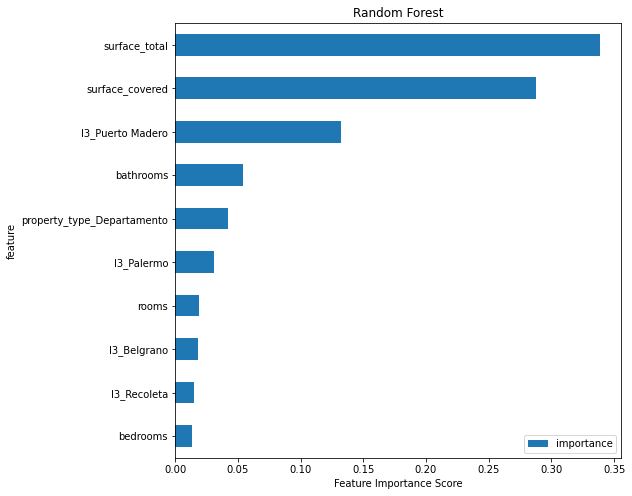

,importance
feature,
bedrooms,0.013427
l3_Recoleta,0.015346
l3_Belgrano,0.018224
rooms,0.019401
l3_Palermo,0.030814
property_type_Departamento,0.042118
bathrooms,0.054007
l3_Puerto Madero,0.132086
surface_covered,0.287301


In [44]:
plot_feature_importances(random_mod, X_train, y_train, title = 'Random Forest')

Tiene mucho sentido que tome la variable del barrio Puerto Madero entre sus tres features más importantes, ya que como habíamos detallado en EDA dado en el sprint 1, este barrio es el que presenta el mayor número de propiedades más costosas. Se puede detallar en el próximo gráfico:

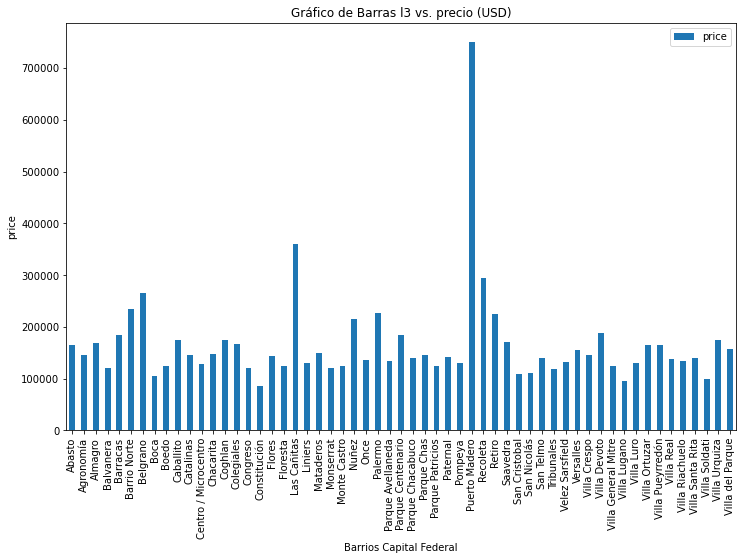

## Modelo 2: XGBoost

In [15]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [16]:
import xgboost as xgb

In [21]:
%%time

xgb_est = xgb.XGBRegressor(verbosity = 0, random_state= 42)

params = {'n_estimators': np.arange(10, 160, 10),
          'max_depth': np.arange(1, 90, 10),
          }

xgb_model = GridSearchCV(xgb_est, param_grid = params)

xgb_model.fit(X_train,y_train)

Wall time: 4h 39min 46s


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=42,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
        

In [27]:
mse = mean_squared_error(y_test, xgb_model.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 3447202726.3159


In [28]:
print("Mejores hiperparámetros encontrados (cv)")
print(xgb_model.best_params_, ":", xgb_model.best_score_, xgb_model.scoring)

Mejores hiperparámetros encontrados (cv)
{'max_depth': 11, 'n_estimators': 80} : 0.8458481212538753 None


In [29]:
#Medidas de entrenamiento
print('Error absoluto medio (MAE):',mean_absolute_error(xgb_model.predict(X_train), y_train))
print('Error Cuadrático Medio (MSE):',mean_squared_error(xgb_model.predict(X_train), y_train))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(xgb_model.predict(X_train), y_train)))
print('Coeficiente de determinación R2:',r2_score(y_train, xgb_model.predict(X_train)))

Error absoluto medio (MAE): 24453.755294634626
Error Cuadrático Medio (MSE): 1972407163.4016733
Raíz del Error Cuadrático Medio (RMSE): 44411.790815071545
Coeficiente de determinación R2: 0.9158201941995309


In [30]:
#Medidas en la prueba
print('Error absoluto medio (MAE):',mean_absolute_error(xgb_model.predict(X_test), y_test))
print('Error Cuadrático Medio (MSE):',mean_squared_error(xgb_model.predict(X_test), y_test))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(xgb_model.predict(X_test), y_test)))
print('Coeficiente de determinación R2:',r2_score(y_test, xgb_model.predict(X_test)))

Error absoluto medio (MAE): 30914.056253600593
Error Cuadrático Medio (MSE): 3447202726.3159094
Raíz del Error Cuadrático Medio (RMSE): 58712.88381876596
Coeficiente de determinación R2: 0.8583345397563011


In [46]:
xgb_model = xgb.XGBRegressor(verbosity = 0, max_depth = 11, n_estimators = 80, random_state= 42)

In [47]:
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=11,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=80, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

### Interpretación importancia de los atributos: XGBoost

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

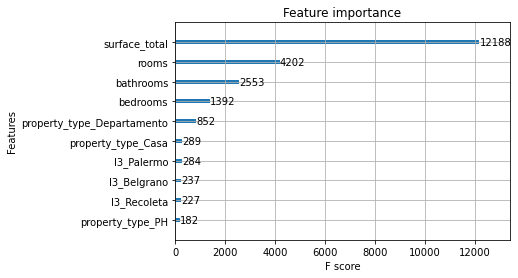

In [49]:
xgb.plot_importance(xgb_model, ax = plt.gca(), max_num_features= 10)

## Histograma RMSE

Modelo: Random Forest
Raíz del error cuadrático medio en Train: 45802.04858237737
Raíz del error cuadrático medio en Test: 59559.28791718435


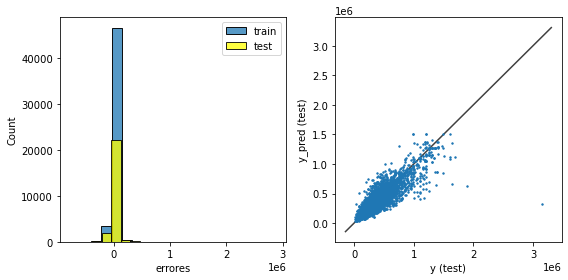

Modelo: Xtreme Gradient Boosting Regressor
Raíz del error cuadrático medio en Train: 44411.790815071545
Raíz del error cuadrático medio en Test: 58712.88381876596


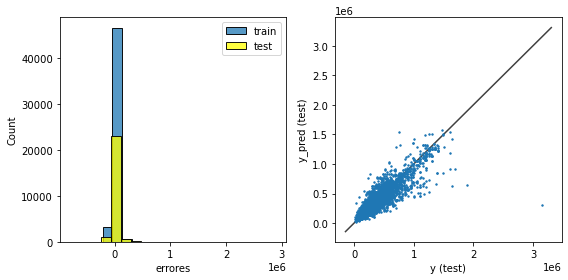

In [33]:
modelos = ['Random Forest', 'Xtreme Gradient Boosting Regressor']

for i, model in enumerate([random_mod, xgb_model]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.histplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.histplot(y_test - y_test_pred, bins = 20, label = 'test', color = 'yellow')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

De acuerdo a la distribución de los errores que vemos acá arriba, podemos observar que estos errores en ambos modelos se concentran en el centro y que la distribución de los errores entre ambos sets (Train y Test) se encuentran dispuestas de tamaño proporcional para ambos modelos. También vemos aunque no es muy evidente, una pequeña cola hacia la derecha de la distribución, volviendo a evidenciar el sesgo que se presentan en los datos en general con respecto al precio de la propiedad. 

Por otro lado, se obtuvo una mejoria en el RMSE para el modelo de XGBoost, finalmente siendo este el modelo escogido como más indicado y de mejor operación. 

### Propuestas de Mejora

Los tiempos de computo son muy altos para ambos modelos, por lo tanto sería viable buscar otra alternativa para realizar la ejecución de modo más efectivo, ya sea ejecutando varios equipos en pararelo, por ejemplo, para el caso del modelo Random Forest. 

Otra alternativa, sería aplicar redes neuronales para este propósito con la finalidad de reducir el costo computacional y observar si se evidencia algún tipo de mejora en los resultados de los errores cuadráticos medios. 


_________________________